In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patheffects as pe
%config InlineBackend.figure_format = 'retina'
import warnings

# Suppress specific font-related warnings
warnings.filterwarnings("ignore", message="findfont: Font family.*")

In [115]:
spotify = pd.read_csv('spotify.csv', encoding='ISO-8859-1')

In [116]:
spotify['Release Date'] = pd.to_datetime(spotify['Release Date'])

In [117]:
for column in ['Spotify Streams', 'YouTube Views', 'TikTok Views']:
    spotify[column] = spotify[column].str.replace(',', '').astype(float)

# spotify.info()

In [118]:
# Fill NaN values for specific columns
columns_to_fill = ['Spotify Streams', 'YouTube Views', 'TikTok Views']
spotify[columns_to_fill] = spotify[columns_to_fill].fillna(spotify[columns_to_fill].median())


In [119]:
spotify = spotify.drop([1637, 4254])
spotify.iloc[np.where(spotify['Artist'] == 'xSyborg')]

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,TIDAL Popularity,Explicit Track


In [120]:
top_streamed_all = spotify[spotify['Spotify Streams'] > 2801110000]

In [121]:
songs_from_2024 = spotify[spotify['Release Date'].dt.year == 2024]
len(songs_from_2024)

top_streamed_2024 = songs_from_2024[songs_from_2024['Spotify Streams'] > 600000000]
len(top_streamed_2024)


20

In [122]:
artist_avg = spotify.groupby('Artist').agg({
    'Spotify Streams': 'mean',
    'YouTube Views': 'mean',
    'TikTok Views': 'mean',
    'Explicit Track': 'any'  # Check if any song by the artist is explicit
}).reset_index()

In [123]:
artist_avg_sorted = artist_avg.sort_values(by='Spotify Streams', ascending=False)
top_10_artists = artist_avg_sorted.head(10)
# top_10_artists

In [124]:
# Find the top artist in each category
top_spotify_artist = top_10_artists.loc[top_10_artists['Spotify Streams'].idxmax()]
top_youtube_artist = top_10_artists.loc[top_10_artists['YouTube Views'].idxmax()]
top_tiktok_artist = top_10_artists.loc[top_10_artists['TikTok Views'].idxmax()]

# Coordinates for annotation
youtube_x = top_youtube_artist['YouTube Views']
youtube_y = top_10_artists['Artist'].tolist().index(top_youtube_artist['Artist']) + bar_width




In [109]:
songs_from_2024 = spotify[spotify['Release Date'].dt.year == 2024]
# Group by artist and calculate the average for each metric
artist_avg_2024 = songs_from_2024.groupby('Artist').agg({
    'Spotify Streams': 'mean',
    'YouTube Views': 'mean',
    'TikTok Views': 'mean',
    'Explicit Track': 'any'
}).reset_index()

In [110]:
artist_avg_2024_sorted = artist_avg_2024.sort_values(by='Spotify Streams', ascending=False).reset_index()
top_10_artists_2024 = artist_avg_2024_sorted.head(16)
top_10_artists_2024
top_10_2024 = top_10_artists_2024.drop([0,1,2,5,10,14]).reset_index(drop=True)
artist_avg_2024_sorted.head(40)

top_10_2024 = artist_avg_2024_sorted.loc[[8, 11, 13, 15, 16, 18, 19, 20, 21, 23]]

In [340]:
print('amount of artists', len(spotify.Artist.unique()))
print('ammount of songs', len(spotify.Track.unique()))
print('max streams', spotify['Spotify Streams'].max())
print('min streams', spotify['Spotify Streams'].min())
# print('Most streamed song', spotify.loc[spotify['Spotify Streams'].idxmax()])
# print('least streamed song', spotify.loc[spotify['Spotify Streams'].idxmin()])

amount of artists 1999
ammount of songs 4370
max streams 4281468720.0
min streams 1071.0


In [94]:
# Sort by 'Release Date'
sorted_songs = spotify.sort_values(by='Release Date')

# Find the oldest and most recent song
oldest_song = sorted_songs.iloc[0]
most_recent_song = sorted_songs.iloc[-1]
# most_recent_song

AttributeError: 'float' object has no attribute 'sort_values'

In [559]:
artist_avg_2024_sorted = artist_avg_2024.sort_values(by='Spotify Streams', ascending=False).reset_index()
top_10_artists_2024 = artist_avg_2024_sorted.head(16)
top_10_artists_2024
top_10_2024 = top_10_artists_2024.drop([0,1,2,5,10,14]).reset_index(drop=True)
artist_avg_2024_sorted.head(40)

top_10_2024 = artist_avg_2024_sorted.loc[[8, 11, 13, 15, 16, 18, 19, 20, 21, 23]]


In [93]:
top_50 = spotify.head(50)
max(top_50['Spotify Streams'])


AttributeError: 'float' object has no attribute 'head'

findfont: Font family 'Apple Color Emoji' not found.
findfont: Font family 'Apple Color Emoji' not found.
findfont: Font family 'Apple Color Emoji' not found.
findfont: Font family 'Apple Color Emoji' not found.
findfont: Font family 'Apple Color Emoji' not found.
findfont: Font family 'Apple Color Emoji' not found.
findfont: Font family 'Apple Color Emoji' not found.
findfont: Font family 'Apple Color Emoji' not found.
findfont: Font family 'Apple Color Emoji' not found.
findfont: Font family 'Apple Color Emoji' not found.
findfont: Font family 'Apple Color Emoji' not found.
findfont: Font family 'Apple Color Emoji' not found.
findfont: Font family 'Apple Color Emoji' not found.
findfont: Font family 'Apple Color Emoji' not found.
findfont: Font family 'Apple Color Emoji' not found.
findfont: Font family 'Apple Color Emoji' not found.
findfont: Font family 'Apple Color Emoji' not found.
findfont: Font family 'Apple Color Emoji' not found.
findfont: Font family 'Apple Color Emoji' not 

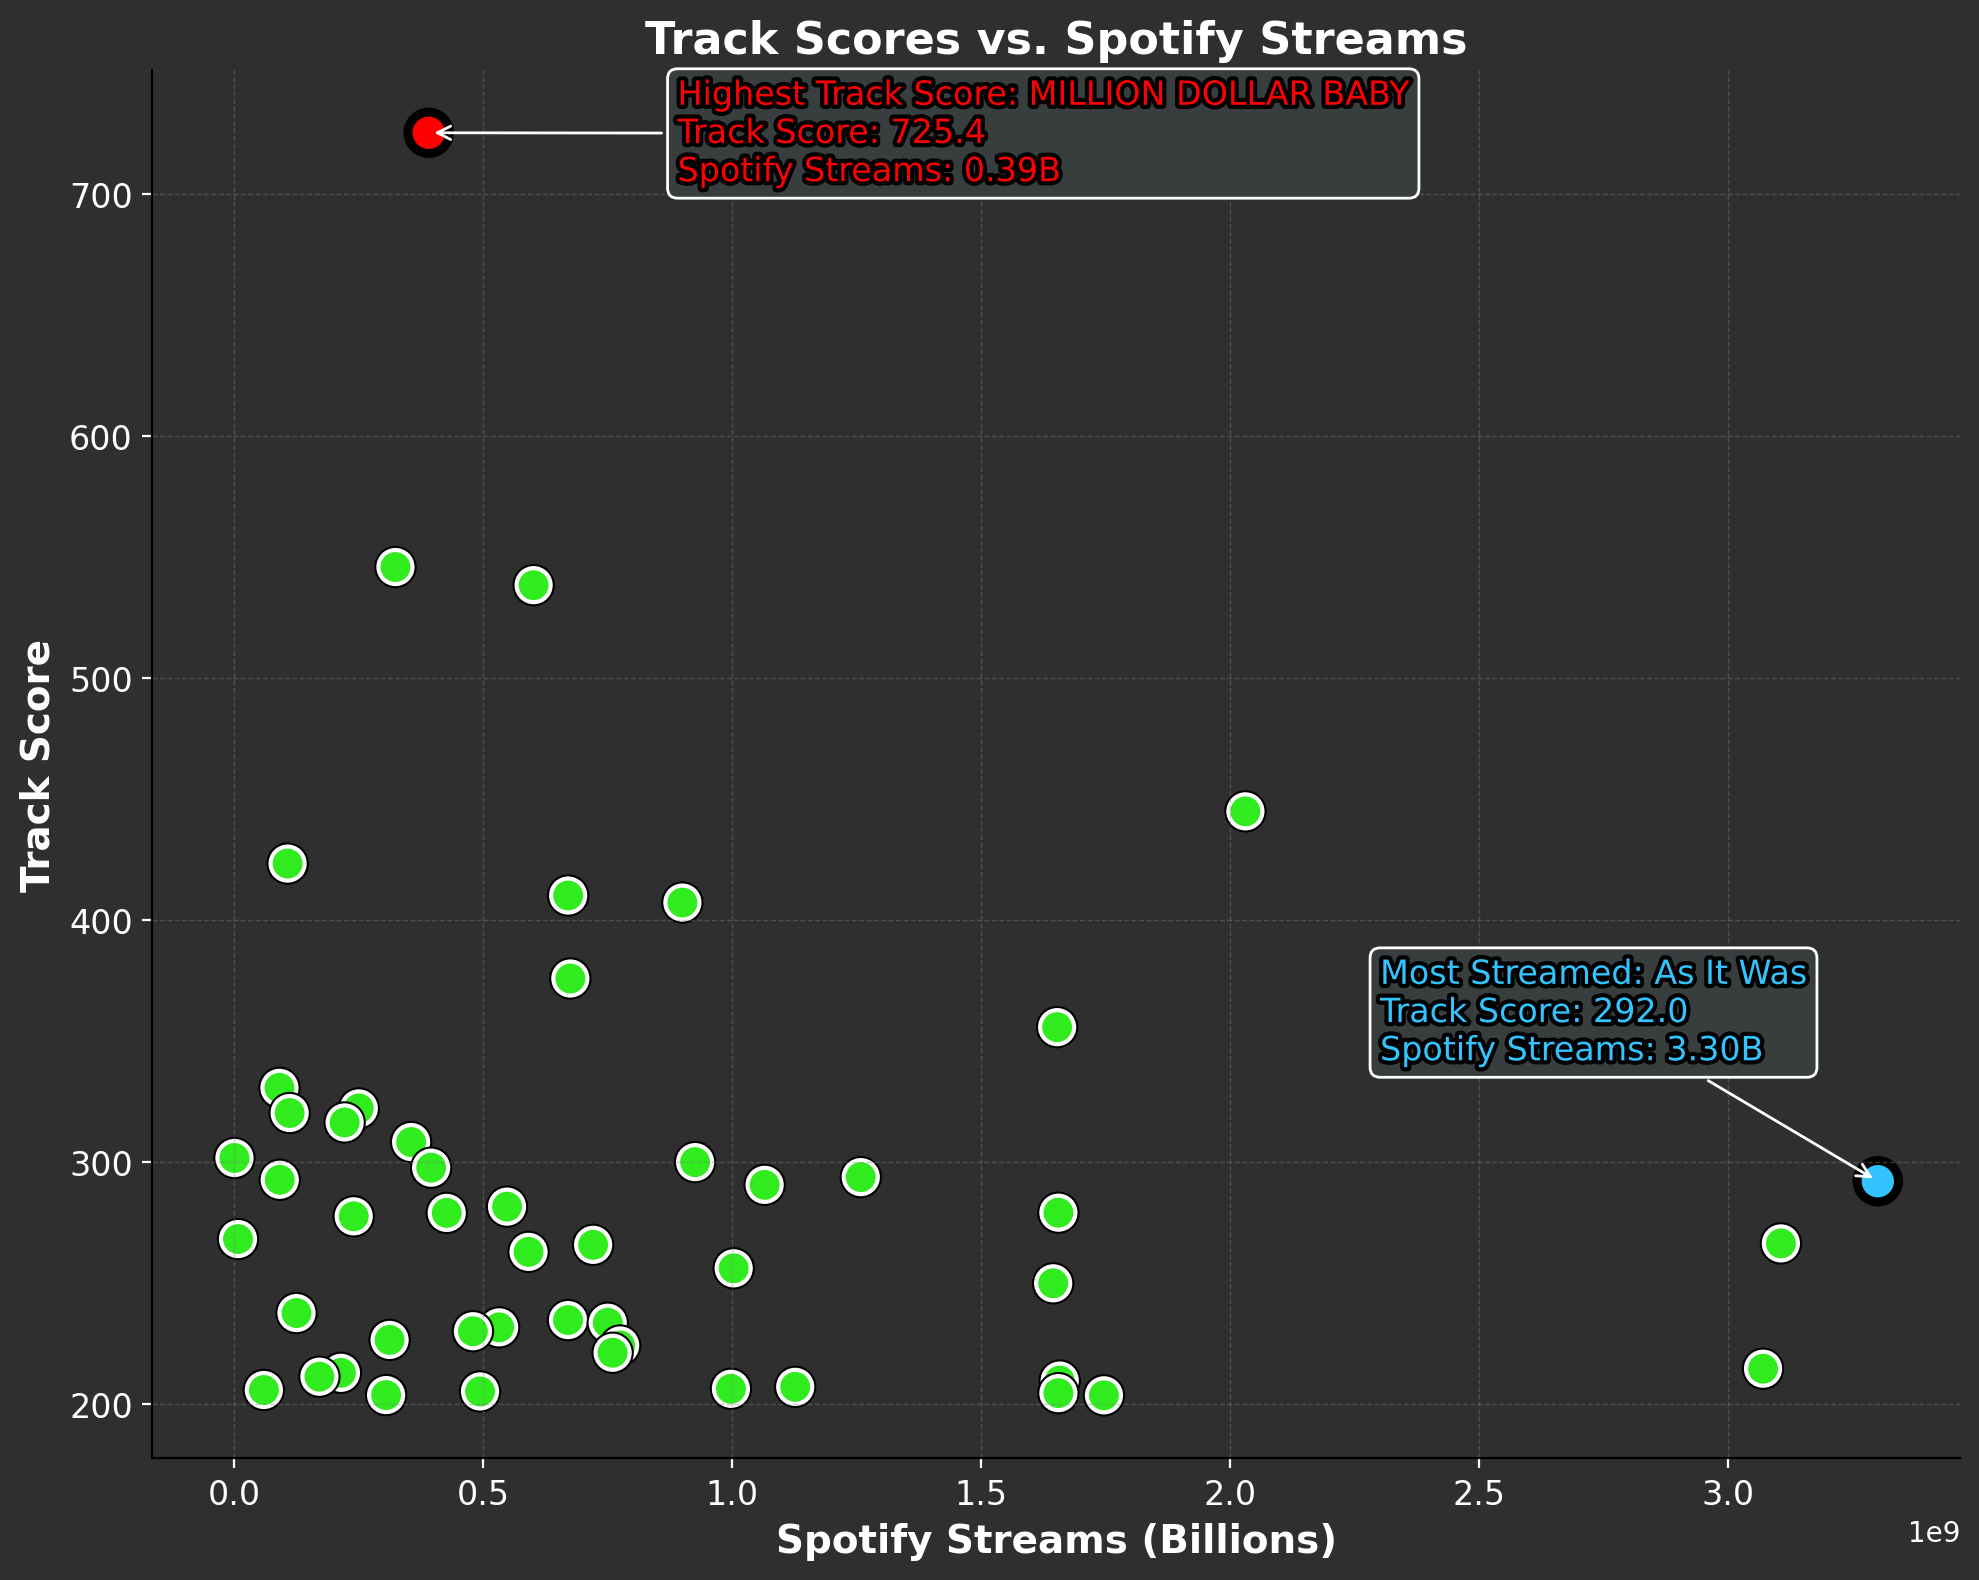

In [626]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patheffects as pe


# Import path effects if not already imported
import matplotlib.patheffects as pe

# Highlight settings
highlight_color = 'r'  # Color for the first highlighted point
highlight_color2 = '#33c4ff'  # Color for the second highlighted point
highlight_index = 0  # Index of the first point to highlight
highlight_index2 = 19  # Index of the second point to highlight

# Plot setup
fig, ax = plt.subplots(figsize=(10, 8))
fig.patch.set_facecolor('#2f2f2f')  # Dark background color
ax.set_facecolor('#2f2f2f')  # Slightly lighter dark background for axes


# Scatter plot
y = top_50['Track Score']
x = top_50['Spotify Streams']
scatter = ax.scatter(x, y, color='#30eb1e', s=150, edgecolor='white', linewidth=1.5, path_effects=[pe.withStroke(linewidth=3, foreground='black')])

# Highlight the first point
ax.scatter(x[highlight_index], y[highlight_index], color=highlight_color, s=200, edgecolor='black', linewidth=2.5, path_effects=[pe.withStroke(linewidth=4, foreground='black')])

# Add annotation for the first highlighted point
ax.annotate(
    f"Highest Track Score: {top_50['Track'][highlight_index]}\n"
    f"Track Score: {y[highlight_index]}\n"
    f"Spotify Streams: {x[highlight_index]/1e9:.2f}B",
    xy=(x[highlight_index], y[highlight_index]),
    xytext=(x[highlight_index] + 0.5e9, y[highlight_index] - 20),  # Move the text to the right
    arrowprops=dict(facecolor='white', edgecolor='white', arrowstyle='->'),  # White arrows
    fontsize=12,
    color=highlight_color,
    bbox=dict(boxstyle="round,pad=0.3", edgecolor='white', facecolor='#383d3d'),
    path_effects=[pe.withStroke(linewidth=3, foreground='black')]
)

# Highlight the second point
ax.scatter(x[highlight_index2], y[highlight_index2], color=highlight_color2, s=200, edgecolor='black', linewidth=2.5, path_effects=[pe.withStroke(linewidth=4, foreground='black')])

# Add annotation for the second highlighted point
ax.annotate(
    f"Most Streamed: {top_50['Track'][highlight_index2]}\n"
    f"Track Score: {y[highlight_index2]}\n"
    f"Spotify Streams: {x[highlight_index2]/1e9:.2f}B",
    xy=(x[highlight_index2], y[highlight_index2]),
    xytext=(x[highlight_index2] - 1e9, y[highlight_index2] + 50),  # Move the text to the right and slightly lower
    arrowprops=dict(facecolor='white', edgecolor='white', arrowstyle='->'),  # White arrows
    fontsize=12,
    color=highlight_color2,
    bbox=dict(boxstyle="round,pad=0.3", edgecolor='white', facecolor='#383d3d'),
    path_effects=[pe.withStroke(linewidth=3, foreground='black')]
)

# Axis labels
ax.set_xlabel('Spotify Streams (Billions)', fontsize=14, color='white', fontweight='bold')
ax.set_ylabel('Track Score', fontsize=14, color='white', fontweight='bold')

# Title
ax.set_title('Track Scores vs. Spotify Streams', fontsize=16, color='white', fontweight='bold')

# Customize grid
ax.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.4)

# Customize ticks
ax.tick_params(axis='x', colors='white', labelsize=12)
ax.tick_params(axis='y', colors='white', labelsize=12)

# Hide spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Show the plot
plt.tight_layout()
plt.show()


findfont: Font family 'Apple Color Emoji' not found.
findfont: Font family 'Apple Color Emoji' not found.
findfont: Font family 'Apple Color Emoji' not found.
findfont: Font family 'Apple Color Emoji' not found.
findfont: Font family 'Apple Color Emoji' not found.
findfont: Font family 'Apple Color Emoji' not found.
findfont: Font family 'Apple Color Emoji' not found.
findfont: Font family 'Apple Color Emoji' not found.
findfont: Font family 'Apple Color Emoji' not found.
findfont: Font family 'Apple Color Emoji' not found.
findfont: Font family 'Apple Color Emoji' not found.
findfont: Font family 'Apple Color Emoji' not found.
findfont: Font family 'Apple Color Emoji' not found.
findfont: Font family 'Apple Color Emoji' not found.
findfont: Font family 'Apple Color Emoji' not found.
findfont: Font family 'Apple Color Emoji' not found.
findfont: Font family 'Apple Color Emoji' not found.
findfont: Font family 'Apple Color Emoji' not found.
findfont: Font family 'Apple Color Emoji' not 

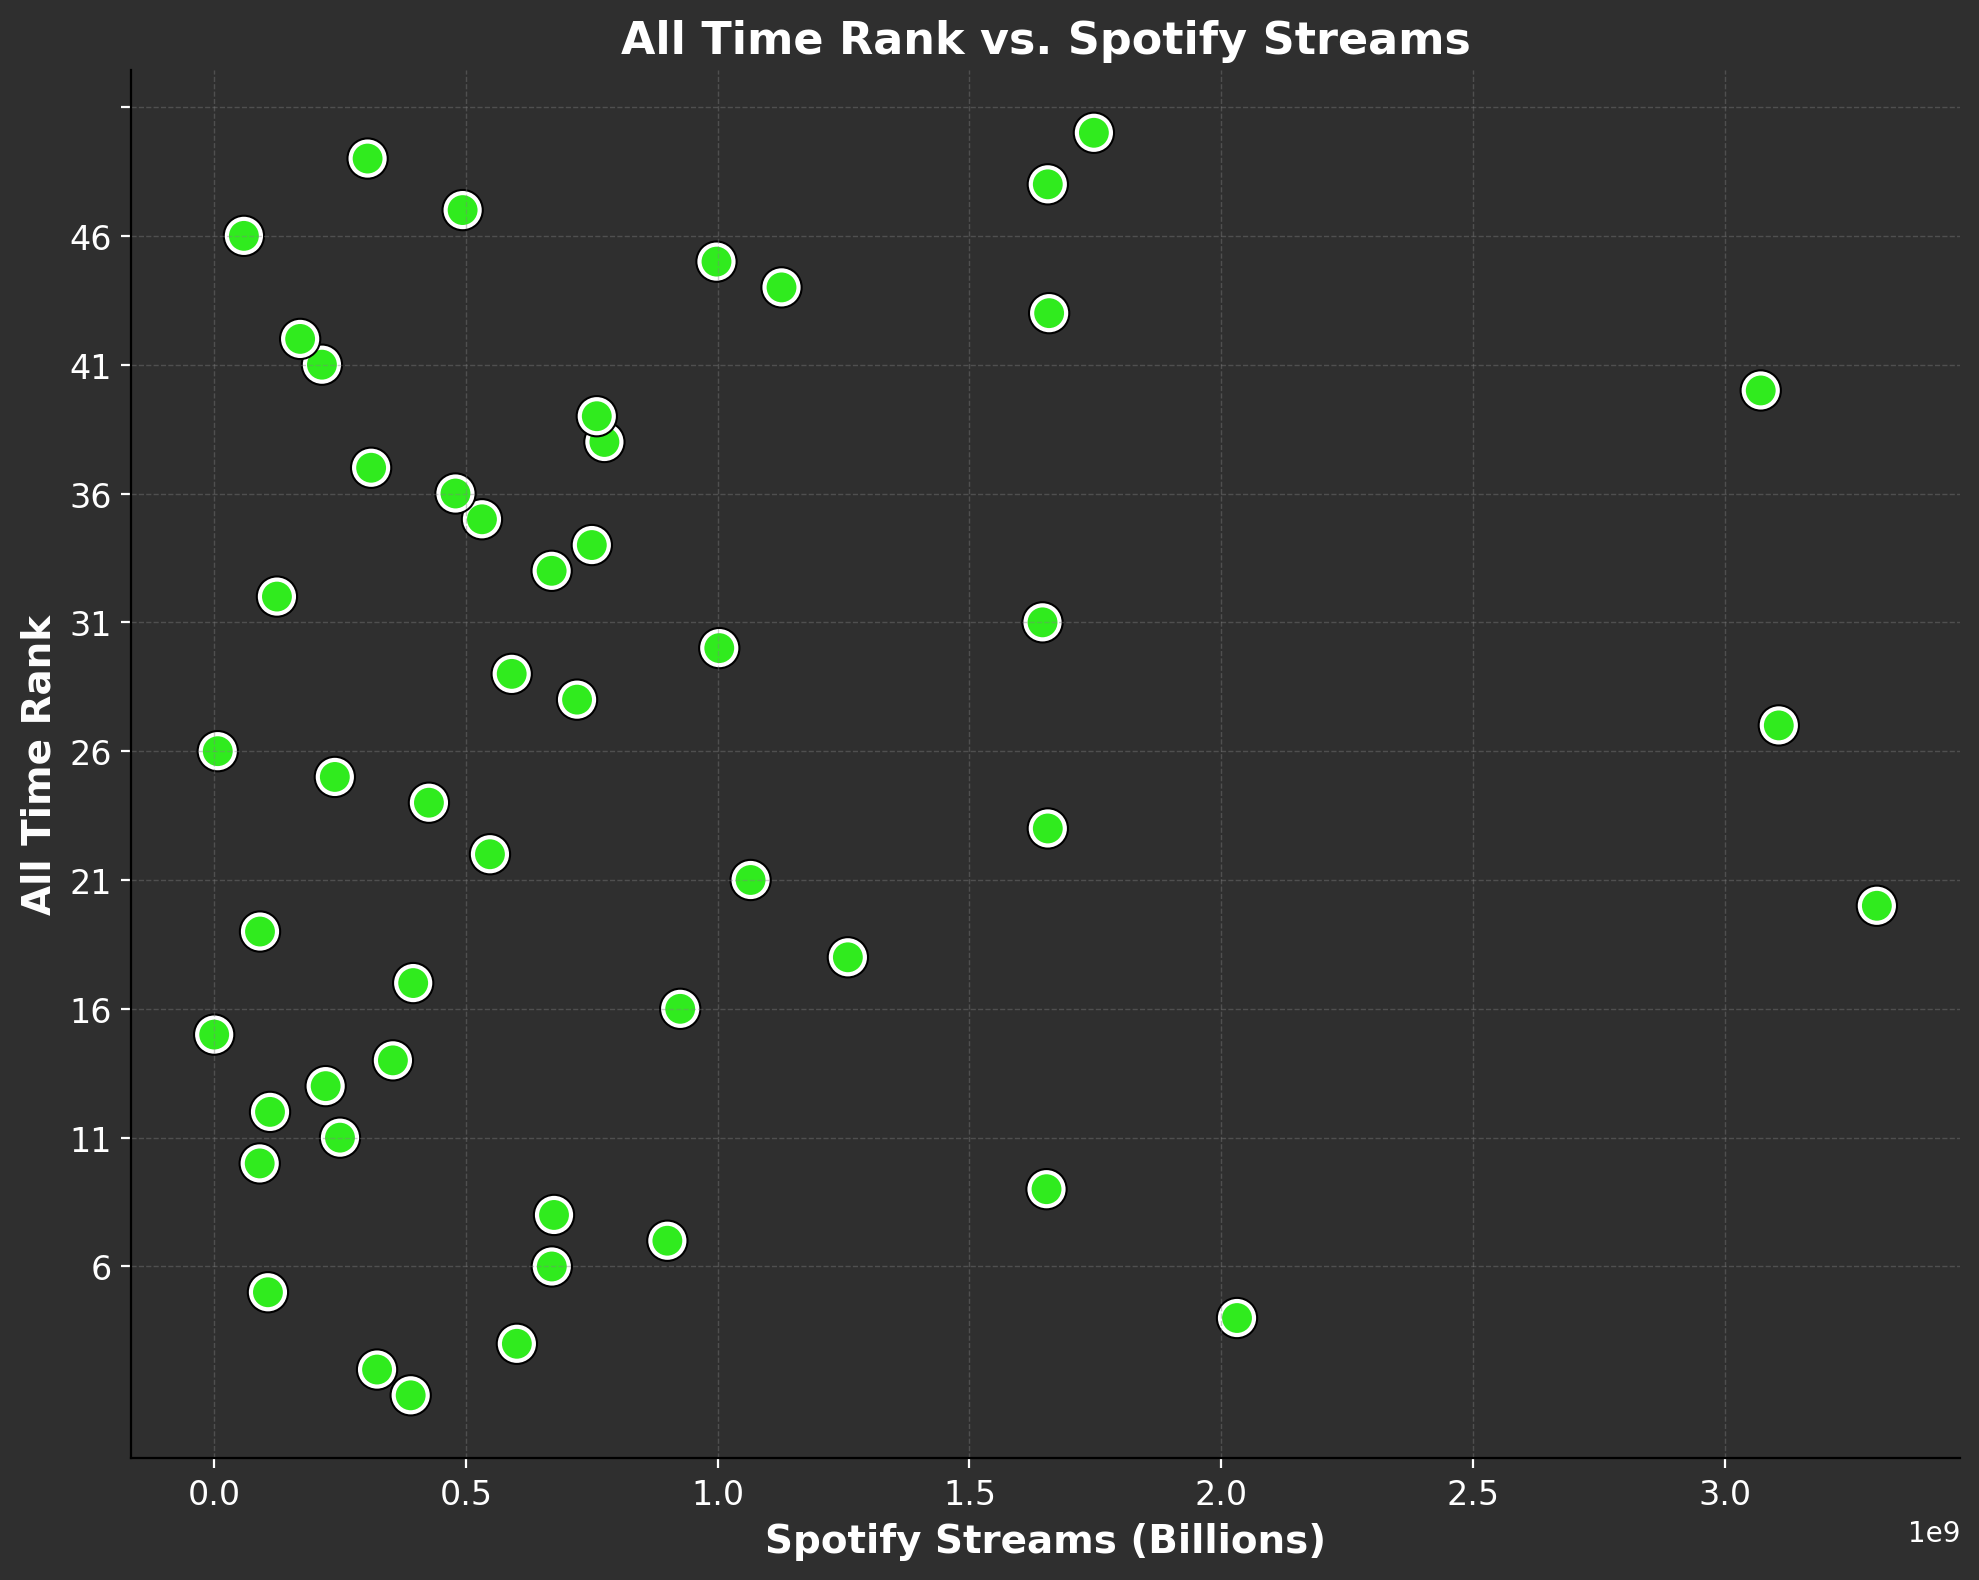

In [627]:
import matplotlib.pyplot as plt
import matplotlib.patheffects as pe

# Plot setup
fig, ax = plt.subplots(figsize=(10, 8))
fig.patch.set_facecolor('#2f2f2f')  # Dark background color
ax.set_facecolor('#2f2f2f')  # Slightly lighter dark background for axes

# Scatter plot
y = top_50['All Time Rank']
x = top_50['Spotify Streams']
scatter = ax.scatter(x, y, color='#30eb1e', s=150, edgecolor='white', linewidth=1.5, path_effects=[pe.withStroke(linewidth=3, foreground='black')])

# Axis labels
ax.set_xlabel('Spotify Streams (Billions)', fontsize=14, color='white', fontweight='bold')
ax.set_ylabel('All Time Rank', fontsize=14, color='white', fontweight='bold')

# Title
ax.set_title('All Time Rank vs. Spotify Streams', fontsize=16, color='white', fontweight='bold')

# Customize grid
ax.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.4)

# Customize ticks
ax.tick_params(axis='x', colors='white', labelsize=12)
ax.tick_params(axis='y', colors='white', labelsize=12)

# Set y-ticks from 5 to 50 with increments of 5
ax.set_yticks(range(5, 51, 5))

# Hide spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Show the plot
plt.tight_layout()
plt.show()



findfont: Font family "['Apple Color Emoji'" not found.
findfont: Font family "'sans-serif']" not found.
findfont: Font family "['Apple Color Emoji'" not found.
findfont: Font family "'sans-serif']" not found.
findfont: Font family "['Apple Color Emoji'" not found.
findfont: Font family "'sans-serif']" not found.
findfont: Font family "['Apple Color Emoji'" not found.
findfont: Font family "'sans-serif']" not found.
findfont: Font family "['Apple Color Emoji'" not found.
findfont: Font family "'sans-serif']" not found.
findfont: Font family "['Apple Color Emoji'" not found.
findfont: Font family "'sans-serif']" not found.
findfont: Font family "['Apple Color Emoji'" not found.
findfont: Font family "'sans-serif']" not found.
findfont: Font family "['Apple Color Emoji'" not found.
findfont: Font family "'sans-serif']" not found.
findfont: Font family "['Apple Color Emoji'" not found.
findfont: Font family "'sans-serif']" not found.
findfont: Font family "['Apple Color Emoji'" not found.

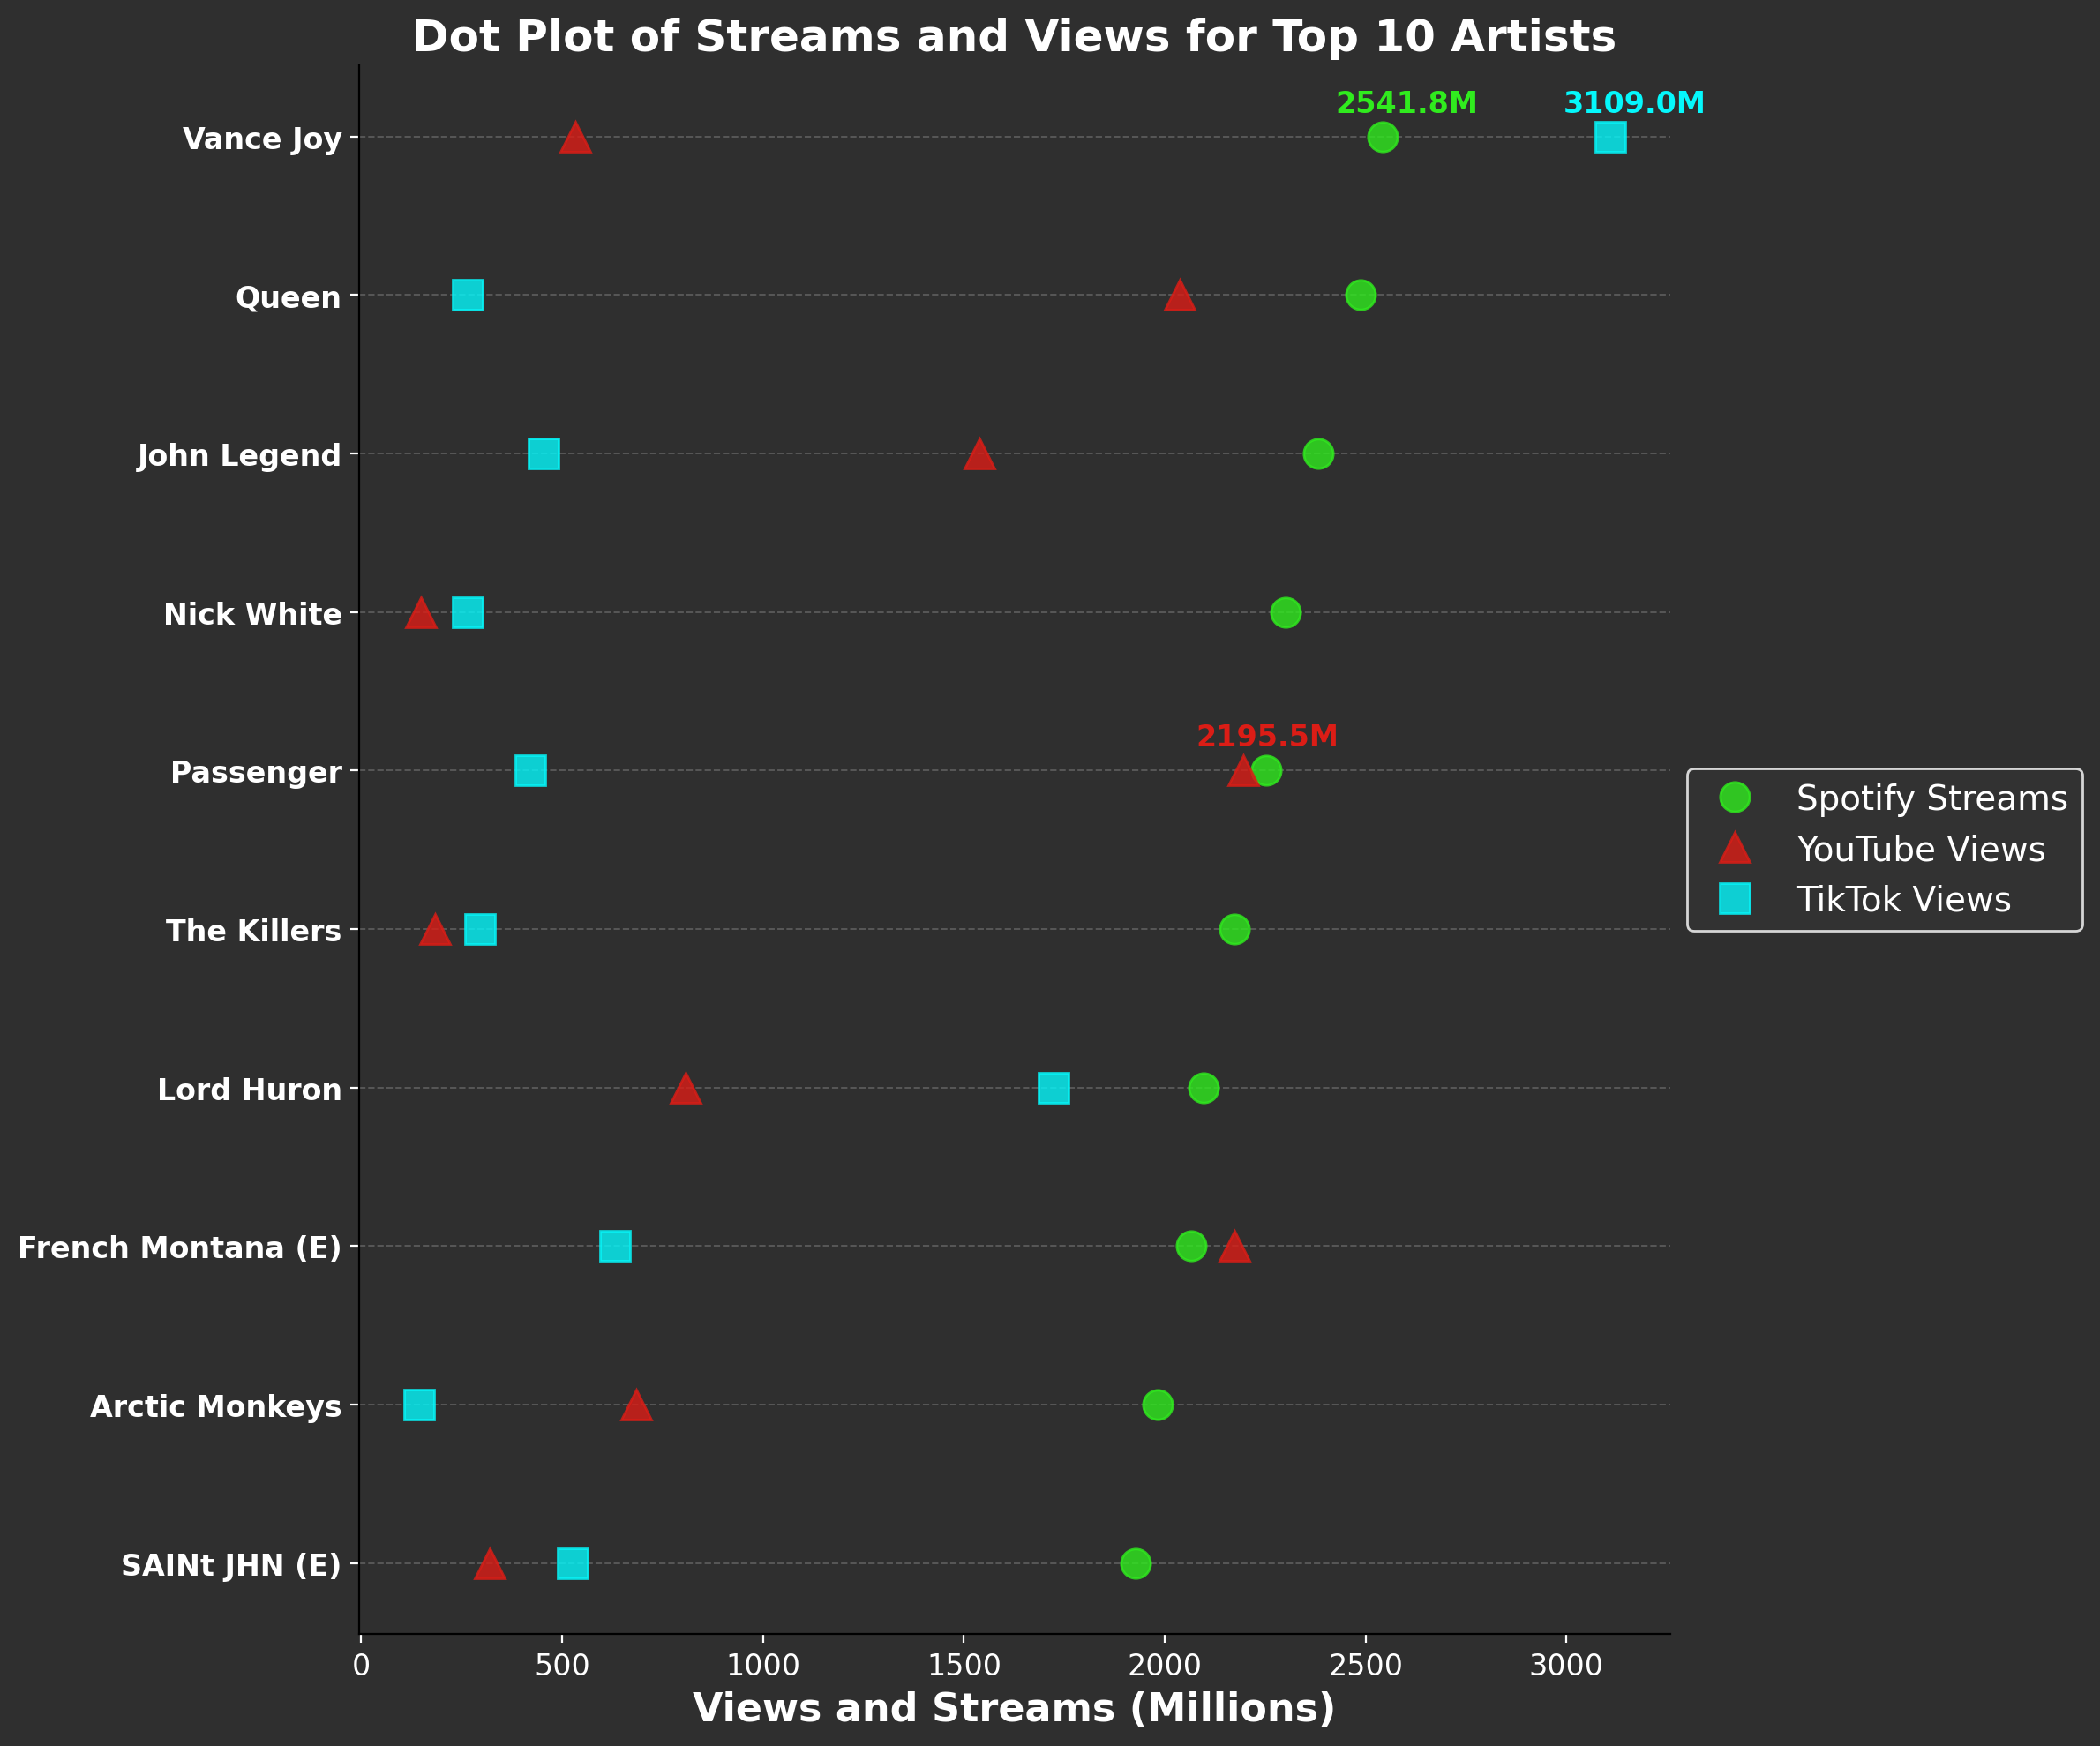

In [97]:


# Define colors
colors = ['#30eb1e', '#db1d16', '#05f8fc']


# Data preparation
spotify_streams = top_10_artists['Spotify Streams'] / 1e6  # Convert to millions
youtube_views = top_10_artists['YouTube Views'] / 1e6
tiktok_views = top_10_artists['TikTok Views'] / 1e6

# Define positions for each artist
y_positions = np.arange(len(top_10_artists['Artist']))
artist_labels = [
    f"{artist} (E)" if is_explicit else artist
    for artist, is_explicit in zip(top_10_artists['Artist'], top_10_artists['Explicit Track'])
]

# Reverse the order to have the highest values at the top
sorted_indices = np.argsort(spotify_streams)[::-1]  # Sort indices in descending order

# Apply sorting
top_10_artists = top_10_artists.iloc[sorted_indices].reset_index(drop=True)
spotify_streams = top_10_artists['Spotify Streams'] / 1e6
youtube_views = top_10_artists['YouTube Views'] / 1e6
tiktok_views = top_10_artists['TikTok Views'] / 1e6
artist_labels = [
    f"{artist} (E)" if is_explicit else artist
    for artist, is_explicit in zip(top_10_artists['Artist'], top_10_artists['Explicit Track'])
]
y_positions = np.arange(len(artist_labels))
y_positions = y_positions[::-1]

# Create dot plot
fig, ax = plt.subplots(figsize=(12, 10))

# Plot each platform with different styles
ax.plot(spotify_streams, y_positions, 'o', color=colors[0], markersize=12, label='Spotify Streams', alpha=0.8)
ax.plot(youtube_views, y_positions, '^', color=colors[1], markersize=12, label='YouTube Views', alpha=0.8)
ax.plot(tiktok_views, y_positions, 's', color=colors[2], markersize=12, label='TikTok Views', alpha=0.8)

# Annotate the top streams
def annotate_top_streams(ax, data, y_positions, label, color):
    top_idx = np.argmax(data)
    ax.annotate(f'{data[top_idx]:.1f}M', (data[top_idx], y_positions[top_idx]), 
                textcoords="offset points", xytext=(10, 10), ha='center', 
                fontsize=12, color=color, fontweight='bold')

annotate_top_streams(ax, spotify_streams, y_positions, 'Spotify Streams', colors[0])
annotate_top_streams(ax, youtube_views, y_positions, 'YouTube Views', colors[1])
annotate_top_streams(ax, tiktok_views, y_positions, 'TikTok Views', colors[2])

# Set y-ticks and labels
ax.set_yticks(y_positions)
ax.set_yticklabels(artist_labels, fontsize=14, color='white', fontweight='bold')

# Add labels and title with custom font and color
ax.set_xlabel('Views and Streams (Millions)', fontsize=16, color='white', fontweight='bold')
ax.set_title('Dot Plot of Streams and Views for Top 10 Artists', fontsize=18, color='white', fontweight='bold')

# Change all other text to white
ax.tick_params(axis='x', colors='white', labelsize=12)
ax.tick_params(axis='y', colors='white', labelsize=12)

# Set axis face color to a dark theme
ax.set_facecolor('#2f2f2f')
fig.patch.set_facecolor('#2f2f2f')

# Add legend with custom style
legend = ax.legend(fontsize=14, loc='center left', bbox_to_anchor=(1, 0.5), frameon=True, facecolor='#333333', edgecolor='white', labelcolor='white')
for text in legend.get_texts():
    text.set_color("white")

# Add a subtle grid with transparency
ax.grid(axis='y', color='gray', linestyle='--', linewidth=0.7, alpha=0.5)

# Hide the top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Show plot
plt.tight_layout()
plt.show()


In [111]:
artist_avg_2024_sorted = artist_avg_2024.sort_values(by='Spotify Streams', ascending=False).reset_index()
top_10_artists_2024 = artist_avg_2024_sorted.head(16)
top_10_artists_2024
top_10_2024 = top_10_artists_2024.drop([0,1,2,5,10,14]).reset_index(drop=True)
artist_avg_2024_sorted.head(40)

top_10_2024 = artist_avg_2024_sorted.loc[[8, 11, 13, 15, 16, 18, 19, 20, 21, 23]]

findfont: Font family "['Apple Color Emoji'" not found.
findfont: Font family "'sans-serif']" not found.
findfont: Font family "['Apple Color Emoji'" not found.
findfont: Font family "'sans-serif']" not found.
findfont: Font family "['Apple Color Emoji'" not found.
findfont: Font family "'sans-serif']" not found.
findfont: Font family "['Apple Color Emoji'" not found.
findfont: Font family "'sans-serif']" not found.
findfont: Font family "['Apple Color Emoji'" not found.
findfont: Font family "'sans-serif']" not found.
findfont: Font family "['Apple Color Emoji'" not found.
findfont: Font family "'sans-serif']" not found.
findfont: Font family "['Apple Color Emoji'" not found.
findfont: Font family "'sans-serif']" not found.
findfont: Font family "['Apple Color Emoji'" not found.
findfont: Font family "'sans-serif']" not found.
findfont: Font family "['Apple Color Emoji'" not found.
findfont: Font family "'sans-serif']" not found.
findfont: Font family "['Apple Color Emoji'" not found.

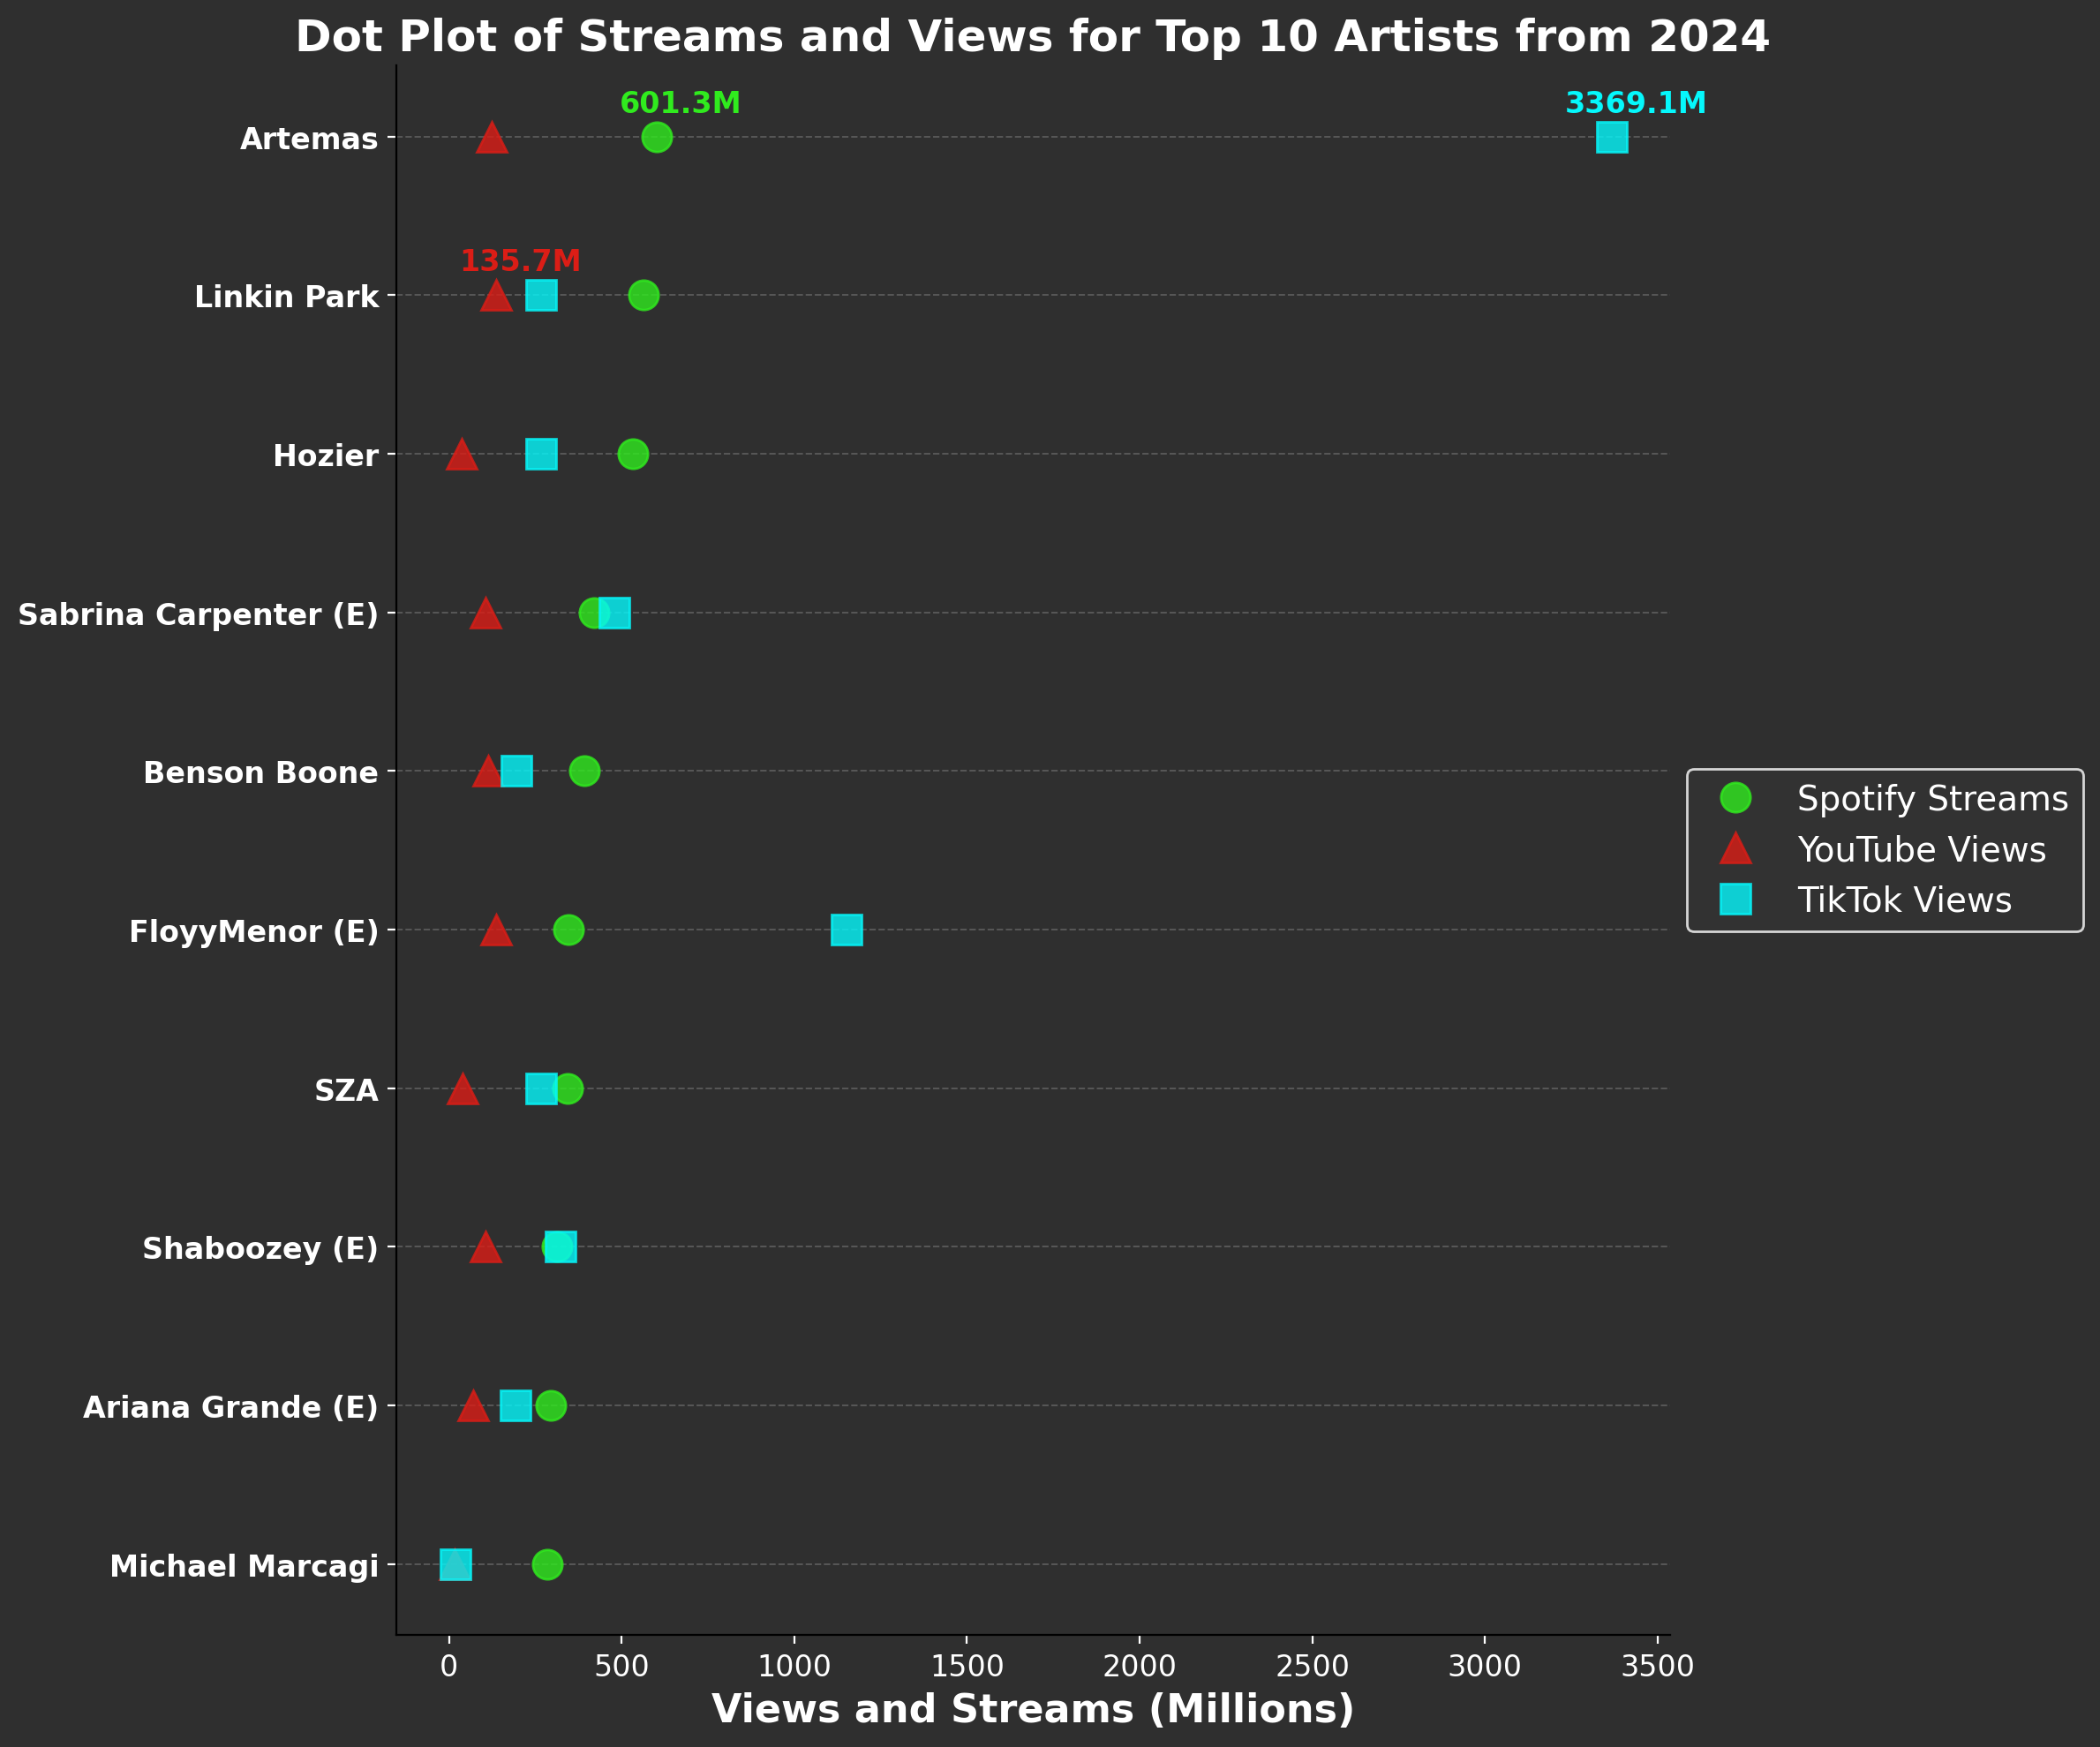

In [113]:


# Define colors
colors = ['#30eb1e', '#db1d16', '#05f8fc']


# Data preparation
spotify_streams = top_10_2024['Spotify Streams'] / 1e6  # Convert to millions
youtube_views = top_10_2024['YouTube Views'] / 1e6
tiktok_views = top_10_2024['TikTok Views'] / 1e6

# Define positions for each artist
y_positions = np.arange(len(top_10_2024['Artist']))
artist_labels = [
    f"{artist} (E)" if is_explicit else artist
    for artist, is_explicit in zip(top_10_2024['Artist'], top_10_2024['Explicit Track'])
]

# Reverse the order to have the highest values at the top
sorted_indices = np.argsort(spotify_streams)[::-1]  # Sort indices in descending order

# Apply sorting
top_10_2024 = top_10_2024.iloc[sorted_indices].reset_index(drop=True)
spotify_streams = top_10_2024['Spotify Streams'] / 1e6
youtube_views = top_10_2024['YouTube Views'] / 1e6
tiktok_views = top_10_2024['TikTok Views'] / 1e6
artist_labels = [
    f"{artist} (E)" if is_explicit else artist
    for artist, is_explicit in zip(top_10_2024['Artist'], top_10_2024['Explicit Track'])
]
y_positions = np.arange(len(artist_labels))
y_positions = y_positions[::-1]

# Create dot plot
fig, ax = plt.subplots(figsize=(12, 10))

# Plot each platform with different styles
ax.plot(spotify_streams, y_positions, 'o', color=colors[0], markersize=12, label='Spotify Streams', alpha=0.8)
ax.plot(youtube_views, y_positions, '^', color=colors[1], markersize=12, label='YouTube Views', alpha=0.8)
ax.plot(tiktok_views, y_positions, 's', color=colors[2], markersize=12, label='TikTok Views', alpha=0.8)

# Annotate the top streams
def annotate_top_streams(ax, data, y_positions, label, color):
    top_idx = np.argmax(data)
    ax.annotate(f'{data[top_idx]:.1f}M', (data[top_idx], y_positions[top_idx]), 
                textcoords="offset points", xytext=(10, 10), ha='center', 
                fontsize=12, color=color, fontweight='bold')

annotate_top_streams(ax, spotify_streams, y_positions, 'Spotify Streams', colors[0])
annotate_top_streams(ax, youtube_views, y_positions, 'YouTube Views', colors[1])
annotate_top_streams(ax, tiktok_views, y_positions, 'TikTok Views', colors[2])

# Set y-ticks and labels
ax.set_yticks(y_positions)
ax.set_yticklabels(artist_labels, fontsize=14, color='white', fontweight='bold')

# Add labels and title with custom font and color
ax.set_xlabel('Views and Streams (Millions)', fontsize=16, color='white', fontweight='bold')
ax.set_title('Dot Plot of Streams and Views for Top 10 Artists from 2024', fontsize=18, color='white', fontweight='bold')

# Change all other text to white
ax.tick_params(axis='x', colors='white', labelsize=12)
ax.tick_params(axis='y', colors='white', labelsize=12)

# Set axis face color to a dark theme
ax.set_facecolor('#2f2f2f')
fig.patch.set_facecolor('#2f2f2f')

# Add legend with custom style
legend = ax.legend(fontsize=14, loc='center left', bbox_to_anchor=(1, 0.5), frameon=True, facecolor='#333333', edgecolor='white', labelcolor='white')
for text in legend.get_texts():
    text.set_color("white")

# Add a subtle grid with transparency
ax.grid(axis='y', color='gray', linestyle='--', linewidth=0.7, alpha=0.5)

# Hide the top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Show plot
plt.tight_layout()
plt.show()
